In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load packages
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#% matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/dssi/colab/Palm Oil/data/palm_oil_grievance_logs.csv')
#print(df)
df.head(5)

,pk,source,internal_id,status,submitted_on,accepted_on,last_updated_on,country,region,complainants,respondents,respondent_sector,respondent_parent_company,respondent_supplier,summary,history,external_link,extras
0,1,Roundtable on Sustainable Palm Oil (RSPO),500Mg00000L0di6IAB,Closed,2/26/2025,4/15/2025,5/20/2025,Indonesia,Sumatera Selatan,Confidential,PT Sawit Mas Sejahtera,Oil Palm Growers,Golden Agri-Resources (GAR),NaN,That the Respondent allegedly transferred the ...,2025-05-20: CP's Decision Letter dated 20. 05....,https://rspo.my.site.com/Complaint/s/case/500M...,{'case_number': 'RSPO/2025/02/RR'}
1,2,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVwYqYAK,In Progress - Investigation,11/29/2024,1/16/2025,1/16/2025,Mexico,NaN,Confidential,INDUSTRIAS OLEOPALMA S.A. DE C.V.,Oil Palm Growers,Oleoquímica Mexicana S.A. de C.V.,NaN,The Complainant alleges that the Respondent ha...,2025-04-30: The Secretariat furnished the Resp...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/17/MAM'}
2,3,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVxmPYAS,In Progress - Investigation,11/28/2024,1/21/2025,1/21/2025,Colombia,Montes de María,Confidential,OLEOFLORES S A S,Processors and/or Traders,Musim Mas Holdings Pte.,NaN,1.The Complainant alleges that the Respondent ...,2025-04-30: The Complaints Panels directive to...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/18/HN'}
3,4,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVGg2YAG,In Progress - Investigation,10/16/2024,11/18/2024,11/18/2024,Indonesia,Riau,S. Samsul Hadi,PT Guntung Idamannusa,Oil Palm Growers,Compañía Industrial Aceitera Coto Cincuenta y ...,NaN,The Respondent's Corporate Social Responsibili...,2025-04-30: The Complaints Panel has directed ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/14/RH'}
4,5,Roundtable on Sustainable Palm Oil (RSPO),500GB00003vMwFgYAK,In Progress - Investigation,9/11/2024,10/29/2024,10/29/2024,Costa Rica,Pococi/Limón,Confidential,Compañía Palma Tica S.A.,Oil Palm Growers,NaN,NaN,The Complainant alleges that the Respondent br...,2025-04-30: The Briefing Note is in progress. ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/13/MAM'}


In [ ]:
print(df.columns)

Index(['pk', 'source', 'internal_id', 'status', 'submitted_on', 'accepted_on',
       'last_updated_on', 'country', 'region', 'complainants', 'respondents',
       'respondent_sector', 'respondent_parent_company', 'respondent_supplier',
       'summary', 'history', 'external_link', 'extras'],
      dtype='object')


In [ ]:
#stop words, lower case, and remove punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# preprocessing function
def clean_text(text):
    # convert non-string types to string for potential na vals
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()
    tokens = text.split()
    tokens = [word.strip("".join(punctuation)) for word in tokens]
    tokens = [word for word in tokens if word and word not in stop_words]
    return tokens

# Add cleaned tokens to the df
df["tokens"] = df["summary"].apply(clean_text)

# Define the list of words to filter out
words_to_filter = {'nan'}

# filter out words that we think are not helpful
df['flt_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in words_to_filter])

# use filtered tokens and join back to string
textdf_clean = df['flt_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# try bag of words (bow)

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(textdf_clean)

# bow dataframe
bow_df = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

print(bow_df)

     000  0026  0039  055243  07  08  10  100  101  106  ...  yp  ypj  ypph  \
0      0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
1      0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
2      0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
3      0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
4      0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
..   ...   ...   ...     ...  ..  ..  ..  ...  ...  ...  ...  ..  ...   ...   
425    0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
426    0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
427    0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
428    0     0     0       0   0   0   0    0    0    0  ...   0    0     0   
429    0     0     0       0   0   0   0    0    0    0  ...   0    0     0   

     yulided  yusniarhas  zain  zedtee  zero  zone 

In [ ]:
# add up word counts
word_counts = bow_df.sum(axis=0)

# sort the words by their total counts (descending)
bowtop_words = word_counts.sort_values(ascending=False)

# top 20 most frequent words
num_words = 50 # can change # to have more or less words
display(bowtop_words.head(num_words))

,0
pt,490
report,207
palm,189
land,178
oil,177
respondent,171
rspo,163
company,140
forest,128
plantation,107


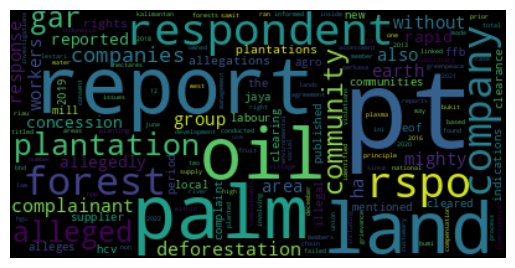

In [ ]:
word_cloud_dict = {}
for key, val in bow_df.sum(axis=0).items():
    word_cloud_dict[key] = val

wordcloud = WordCloud().generate_from_frequencies(word_cloud_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#try TF-IDF
# convert text to TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
# try wordnet visualization

X_tfidf = vectorizer.fit_transform(textdf_clean).toarray()

# scores
term_frequencies = np.array(X_tfidf > 0, dtype=int).sum(axis=0)
n_documents = len(textdf_clean)
idf_scores = np.log(n_documents / (term_frequencies + 1))

# Compute manual TF-IDF matrix
manual_tfidf = X_tfidf * idf_scores

manual_tfidf_df = pd.DataFrame(manual_tfidf, columns=vectorizer.get_feature_names_out())
print(manual_tfidf_df)

     000  0026  0039  055243   07   08   10  100  101  106  ...   yp  ypj  \
0    0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1    0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2    0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3    0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4    0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..   ...   ...   ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
425  0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
426  0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
427  0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
428  0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
429  0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

     ypph  yulided  yusniarhas  zain  zedtee  zero  zone  zones  
0     0.0

In [ ]:
# sum the TF-IDF scores for each word
word_scores = manual_tfidf_df.sum(axis=0)

# Sort the words by their total TF-IDF scores in descending order
tftop_words = word_scores.sort_values(ascending=False)

# Display the top N most common words (you can adjust N)
num_words = 20  # Change this number to see more or fewer words
display(tftop_words.head(num_words))

,0
respondent,26.061035
pt,23.230367
workers,18.382567
land,18.129738
company,17.912401
report,17.292725
community,17.286268
complainant,16.661045
deforestation,16.627013
alleged,16.565587


In [ ]:
# Create a bar chart of the top N most common words
fig = px.bar(x=tftop_words.head(num_words).index,
             y=tftop_words.head(num_words).values,
             labels={'x': 'Words', 'y': 'TF-IDF Score'},
             title=f'Top {num_words} Most Common Words by TF-IDF Score')

# Display the plot
fig.show()

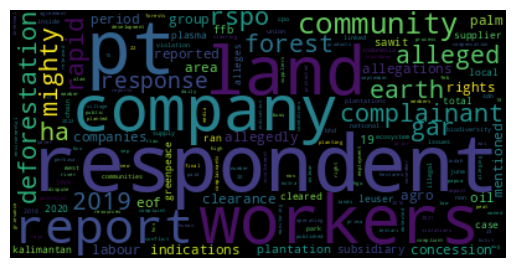

In [ ]:
word_cloud_dict = {}
for key, val in manual_tfidf_df.sum(axis=0).items():
    word_cloud_dict[key] = val

wordcloud = WordCloud().generate_from_frequencies(word_cloud_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# dataframe of both outputs
bow_df_sorted = bowtop_words.reset_index()
bow_df_sorted.columns = ['BOW_Word', 'BOW_Frequency']

tfidf_df_sorted = tftop_words.reset_index()
tfidf_df_sorted.columns = ['TFIDF_Word', 'TFIDF_Score']


combined_word_analysis_df = pd.concat([bow_df_sorted, tfidf_df_sorted], axis=1)

display(combined_word_analysis_df.head(50)) # this is just the top 50 words

,BOW_Word,BOW_Frequency,TFIDF_Word,TFIDF_Score
0,pt,490,respondent,26.061035
1,report,207,pt,23.230367
2,palm,189,workers,18.382567
3,land,178,land,18.129738
4,oil,177,company,17.912401
5,respondent,171,report,17.292725
6,rspo,163,community,17.286268
7,company,140,complainant,16.661045
8,forest,128,deforestation,16.627013
9,plantation,107,alleged,16.565587


In [ ]:
combined_word_analysis_df.to_csv('combined_word_analysis.csv', index=False)

print("DataFrame exported to 'combined_word_analysis.csv' successfully.")

DataFrame exported to 'combined_word_analysis.csv' successfully.
